<a href="https://colab.research.google.com/github/ravellys/Bootcamp-IGTI/blob/main/DevPython_Desafio_M%C3%B3dulo_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ravellys/Bootcamp-IGTI/main/datasets_diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [17]:
y[y==1].sum()

268

In [20]:
from sklearn.preprocessing  import MinMaxScaler

normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas=normaliza.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, y, test_size=0.30,random_state=42)


In [24]:
X_train.shape

(537, 8)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
y_pred = clf_KNN.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6796536796536796

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf_KNN = DecisionTreeClassifier(random_state=1)
clf_KNN.fit(X_train, y_train)
y_pred = clf_KNN.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.696969696969697

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf_KNN = RandomForestClassifier(max_depth=10, random_state=1)
clf_KNN.fit(X_train, y_train)
y_pred = clf_KNN.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7445887445887446

In [30]:
from sklearn.svm import SVC
clf_KNN = SVC(gamma='auto',random_state=1)
clf_KNN.fit(X_train, y_train)
y_pred = clf_KNN.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7705627705627706

In [31]:
from sklearn.neural_network import MLPClassifier
clf_KNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_KNN.fit(X_train, y_train)
y_pred = clf_KNN.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7316017316017316

In [34]:
import numpy as np
SEED = 1232
np.random.seed(SEED)

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
# validação cruzada
def val_cruzada(model, x, y, n_splits=10, **kwargs):

  partes = KFold(n_splits, shuffle=True)
  modelo = model(**kwargs)
  resultados = cross_validate(modelo, x, y, cv=partes, scoring="accuracy")
  return -1 * resultados['test_score']

In [35]:
import matplotlib.pyplot as plt
# plot hist validação cruzada
def plot_hist_val_cruzada(title, model, x_treino, y_treino, n_splits=10, **kwargs):
  data = val_cruzada(model=model, x=x_treino, y=y_treino, n_splits=n_splits, **kwargs)
  ax.hist(data, bins=10, label=title)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



models = dict(
    KNeighborsClassifier={"model": KNeighborsClassifier, "kwargs":dict(n_neighbors=5)},
    RandomForestClassifier={"model": RandomForestClassifier, "kwargs":dict(max_depth=10, random_state=1)},
    SVC={"model": SVC, "kwargs":dict(gamma='auto',random_state=1)}, 
    MLPClassifier={"model": MLPClassifier, "kwargs":dict(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)},
)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

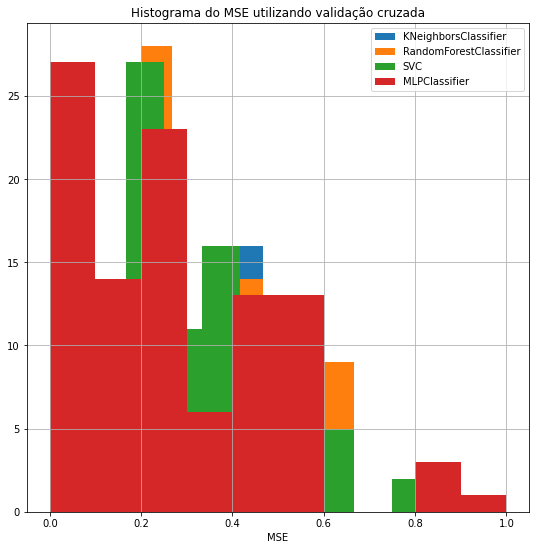

In [39]:

# Plot histograma de comparação

fig, ax = plt.subplots( figsize=(9, 9))
for i, name in enumerate(list(models.keys())):
  model=models[name]
  plot_hist_val_cruzada(title=name, model=model['model'], x_treino=X_train, y_treino=y_train, n_splits=100, **model['kwargs'])

plt.xlabel('MSE')
plt.legend()
plt.grid()
plt.title("Histograma do MSE utilizando validação cruzada")
fig.savefig('cross_validat.png', bbox_inches='tight')
plt.show()

In [33]:
import threading
import time
from random import randint

def funcao_1(num):
  n = num
  while n>0:
    n-=1
    print(f"n_1{n}")
    time.sleep(randint(0,2))

def funcao_2(num):
  n = num
  while n<100:
    n+=1
    print(f"n_2{n}")
    time.sleep(randint(0,2))   

if __name__ == '__main__':
  t1 = threading.Thread(target=funcao_1, args=(0,)) 
  t2 = threading.Thread(target=funcao_2, args=(100,)) 
  t1.start() 
  t2.start()
  t1.join()
  t2.join()
  print('FIM')

FIM
